In [2]:
import glob
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# the merged netcdf file
fn = 'august2.nc'
# open the file with xarray library
data = xr.open_dataset(fn)
# assign variables
SM = data['SoilMoist_S_tavg']
Temp = data['AvgSurfT_tavg']
ET = data['Evap_tavg']
time = data['time']
# selects the temperature data values only at the specified coordinate pair
Temp_specific_point = Temp.sel(lat=36.125,lon=-121.125)

In [4]:
# Standard deviation of Temp for one point
Stdev_Temp = int(Temp_specific_point.std())
# Mean of Temp for one point
Mean_Temp = int(Temp_specific_point.mean().values)


In [5]:
vals = list(Temp_specific_point.values)

In [6]:
# finding the anomalies for the specific location: (x-mean)/stdev
anomaly = []
for t in vals:
    anomaly.append((t-Mean_Temp)/Stdev_Temp)
    
anomaly
    
    

[0.004791259765625,
 0.23442586263020834,
 0.4903564453125,
 -0.6906026204427084,
 -1.8511861165364583,
 -2.3976033528645835,
 -1.52349853515625,
 -0.961029052734375,
 -0.12354532877604167,
 -0.184112548828125,
 -0.684112548828125,
 -0.3101704915364583,
 0.11089070638020833,
 1.226837158203125,
 1.8074951171875,
 2.52142333984375,
 2.3401285807291665,
 2.486907958984375,
 2.4909871419270835,
 1.655517578125,
 0.6279398600260416,
 1.1333109537760417,
 0.572906494140625,
 0.2670186360677083,
 -0.5330098470052084,
 -0.4366353352864583,
 -0.88824462890625,
 -0.7922566731770834,
 -0.634368896484375,
 -0.724853515625,
 -0.5572001139322916]

In [7]:
# checking if the anomaly is greater than the standard deviation
method = []
for i in anomaly:
    if(i>Stdev_Temp):
        method.append(1)
    else:
        method.append(0)
        

In [8]:
# Easier method using xarray
Anomaly_Temp = (Temp_specific_point - Temp_specific_point.mean())/Temp_specific_point.std()
Anomaly_Temp

<xarray.DataArray 'AvgSurfT_tavg' (time: 31)>
array([-0.11499683,  0.06571591,  0.26712247, -0.66224246, -1.57557268,
       -2.00557998, -1.31769639, -0.87505665, -0.21599231, -0.26365616,
       -0.65713505, -0.36285843, -0.03150105,  0.8467017 ,  1.303655  ,
        1.86548638,  1.72281506,  1.83832423,  1.84153438,  1.1840551 ,
        0.37539481,  0.77310053,  0.33208587,  0.09136504, -0.5382236 ,
       -0.46238093, -0.81777838, -0.74223991, -0.61798889, -0.68919647,
       -0.55726032])
Coordinates:
  * time     (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2020-08-31
    lon      float32 -121.1
    lat      float32 36.12

Text(0, 0.5, 'Standardized Temperature Anomaly (K)')

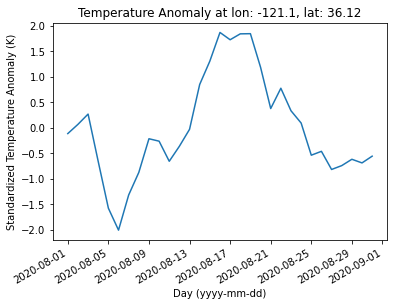

In [9]:
# Anomaly plot for temperature at specific location
Anomaly_Temp.plot()
plt.title("Temperature Anomaly at lon: -121.1, lat: 36.12")
plt.xlabel("Day (yyyy-mm-dd)")
plt.ylabel("Standardized Temperature Anomaly (K)")

In [10]:
# checking if the anomaly is greater than the standard deviation 
flash_drought_temp = (Anomaly_Temp)>Temp_specific_point.std()


Text(0, 0.5, 'Temp>std')

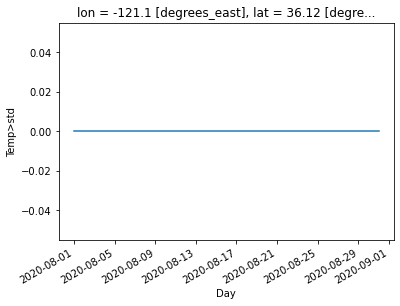

In [11]:
# plotting if there is flash drought based on the Temp>Std_dev
flash_drought_temp.plot()
plt.xlabel("Day")
plt.ylabel("Temp>std")

In [12]:
# finding the mean based on the time only (different means for different coordinates)
Temp.mean(dim='time')

<xarray.DataArray 'AvgSurfT_tavg' (lat: 5, lon: 8)>
array([[299.4528 , 302.60593, 299.04947, 304.87982, 306.08728, 306.64987,
        306.3084 , 306.05096],
       [299.21738, 298.1268 , 298.59555, 304.73923, 306.38226, 306.24817,
        306.0325 , 306.026  ],
       [296.41934, 300.68732, 304.12393, 305.60904, 305.6178 , 305.7231 ,
        305.6579 , 305.60648],
       [298.73404, 301.7087 , 304.32584, 304.7217 , 304.88742, 305.23962,
        304.9699 , 302.86514],
       [301.95642, 303.65033, 304.39285, 304.81314, 304.853  , 307.29044,
        304.21237, 299.80957]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -121.1 -120.9 -120.6 -120.4 ... -119.9 -119.6 -119.4
  * lat      (lat) float32 36.12 36.38 36.62 36.88 37.12

In [13]:
# finding the standard deviation based on the time only (different standard deviations for different coordinates)
Temp.std(dim='time')

<xarray.DataArray 'AvgSurfT_tavg' (lat: 5, lon: 8)>
array([[3.8121486, 3.2173479, 3.1493242, 2.5065134, 2.3411818, 2.2487059,
        2.2726886, 2.2856834],
       [3.7873945, 3.2050455, 2.8553412, 2.4461086, 2.3777983, 2.2922468,
        2.3159807, 2.3221545],
       [3.874188 , 3.050874 , 2.7379498, 2.613958 , 2.5779543, 2.4465673,
        2.3780067, 2.3383527],
       [3.9553862, 3.3919609, 3.0759695, 2.879252 , 2.801394 , 2.5724707,
        2.437808 , 2.500285 ],
       [3.7207446, 3.2695425, 3.0487154, 2.8616936, 2.7360165, 2.7232413,
        2.5517476, 2.29554  ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -121.1 -120.9 -120.6 -120.4 ... -119.9 -119.6 -119.4
  * lat      (lat) float32 36.12 36.38 36.62 36.88 37.12

In [14]:
# testing if the dimension feature for calculating the mean works
Temp_specific_point.mean()

<xarray.DataArray 'AvgSurfT_tavg' ()>
array(299.45276, dtype=float32)
Coordinates:
    lon      float32 -121.1
    lat      float32 36.12

In [15]:
# testing if the dimension feature for calculating the mean works
Temp_specific_point2 = Temp.sel(lat=36.125,lon=-120.875)
Temp_specific_point2.mean()

<xarray.DataArray 'AvgSurfT_tavg' ()>
array(302.60593, dtype=float32)
Coordinates:
    lon      float32 -120.9
    lat      float32 36.12

In [16]:
# testing if the dimension feature for calculating the mean works (location 3)
Temp_specific_point3 = Temp.sel(lat=36.125,lon=-120.375)
Temp_specific_point3.mean()

<xarray.DataArray 'AvgSurfT_tavg' ()>
array(304.87985, dtype=float32)
Coordinates:
    lon      float32 -120.4
    lat      float32 36.12

In [17]:
# finding the temperature anomaly for all coordinates
Temperature_anomaly = (Temp-Temp.mean(dim='time'))
Temperature_anomaly

<xarray.DataArray 'AvgSurfT_tavg' (time: 31, lat: 5, lon: 8)>
array([[[-4.3841553e-01, -2.2219849e-01,  3.1060791e-01, ...,
         -1.0681152e-03,  1.4135742e-01,  2.5683594e-01],
        [-1.1892395e+00, -7.1530151e-01, -4.4143677e-01, ...,
         -3.9773560e-01, -2.0220947e-01, -5.1239014e-02],
        [-1.6886292e+00, -1.4345398e+00, -1.2372742e+00, ...,
         -6.5661621e-01, -3.5534668e-01, -3.1616211e-01],
        [-1.9197693e+00, -1.5862732e+00, -1.4987488e+00, ...,
         -7.3751831e-01, -5.1531982e-01, -2.8585815e-01],
        [-1.8063965e+00, -1.7697144e+00, -1.6697083e+00, ...,
         -1.0933838e+00, -5.8035278e-01, -2.1090698e-01]],

       [[ 2.5048828e-01, -1.4254761e-01,  5.6512451e-01, ...,
         -3.9450073e-01, -4.7933960e-01, -7.9901123e-01],
        [-4.0084839e-01, -9.6832275e-02,  2.2308350e-02, ...,
         -6.7660522e-01, -7.7230835e-01, -1.0567627e+00],
        [-9.0185547e-01, -9.2614746e-01, -8.6459351e-01, ...,
         -8.7655640e-01, -1.0624084e+00, -1.1933899e+00],
        [-1.1834412e+00, -7.7597046e-01, -7.6559448e-01, ...,
         -1.0409851e+00, -1.2907410e+00, -5.2420044e-01],
        [-9.5089722e-01, -8.1054688e-01, -9.4891357e-01, ...,
...
         -2.3201599e+00, -2.4977112e+00, -2.5885315e+00],
        [-1.9548645e+00, -1.7622070e+00, -1.5677795e+00, ...,
         -2.2791748e+00, -2.3125000e+00, -2.5006104e+00],
        [-2.0027771e+00, -1.8636780e+00, -1.7684326e+00, ...,
         -2.0923767e+00, -2.1273193e+00, -2.3202515e+00],
        [-2.2818909e+00, -2.0981750e+00, -2.0455322e+00, ...,
         -2.0454712e+00, -2.1259766e+00, -1.7320557e+00],
        [-2.3650513e+00, -2.3252869e+00, -2.2615051e+00, ...,
         -1.9391174e+00, -1.6120300e+00, -1.4967651e+00]],

       [[-2.1243896e+00, -2.2105103e+00, -2.0166626e+00, ...,
         -2.0882263e+00, -2.1771545e+00, -2.2768250e+00],
        [-1.4924927e+00, -1.4391479e+00, -1.5320129e+00, ...,
         -1.9417419e+00, -1.9636841e+00, -2.0770569e+00],
        [-1.6360474e+00, -1.8228149e+00, -1.8066101e+00, ...,
         -1.8218079e+00, -1.9515381e+00, -2.0338440e+00],
        [-1.8565369e+00, -1.7357788e+00, -1.6345520e+00, ...,
         -1.8959351e+00, -1.9292603e+00, -1.4643250e+00],
        [-1.8196716e+00, -1.8874207e+00, -1.8602600e+00, ...,
         -1.7411499e+00, -1.4127808e+00, -1.2817078e+00]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2020-08-31
  * lon      (lon) float32 -121.1 -120.9 -120.6 -120.4 ... -119.9 -119.6 -119.4
  * lat      (lat) float32 36.12 36.38 36.62 36.88 37.12

In [18]:
# checking if the temperature anomaly is greater than the standard deviation (do not need absolute value since temperature anomaly must be positive)
Temp_anomaly_std = Temperature_anomaly > Temp.std(dim='time')
Temp_anomaly_std

<xarray.DataArray 'AvgSurfT_tavg' (time: 31, lat: 5, lon: 8)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       ...,

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2020-08-31
  * lon      (lon) float32 -121.1 -120.9 -120.6 -120.4 ... -119.9 -119.6 -119.4
  * lat      (lat) float32 36.12 36.38 36.62 36.88 37.12

In [19]:
# Getting the evapotranspiration anomalies for all the coordinates 
# using just mean difference anomaly not standardized anomaly
ET_anomaly = (ET-ET.mean(dim='time'))
ET_anomaly

<xarray.DataArray 'Evap_tavg' (time: 31, lat: 5, lon: 8)>
array([[[ 7.7265977e-06,  9.8765850e-07,  1.9702197e-06, ...,
          1.1177123e-06,  1.2141926e-06,  1.2208151e-06],
        [ 2.4669780e-06,  3.6039919e-06,  6.1283731e-07, ...,
          1.0256624e-06,  1.1019399e-06,  1.1158324e-06],
        [ 2.6485627e-06,  9.4144411e-07,  2.2417544e-06, ...,
          9.9452950e-07,  1.0584017e-06,  1.0735719e-06],
        [ 1.5478799e-06,  1.2543358e-06,  9.4823361e-07, ...,
          1.0412161e-06,  1.0677977e-06,  1.3518794e-06],
        [ 1.1301224e-06,  9.1350444e-08, -1.7995521e-06, ...,
          6.1205969e-07,  6.7620090e-07,  7.1806971e-07]],

       [[ 6.6076609e-06,  9.0930575e-07,  1.9631034e-06, ...,
          6.4614972e-07,  6.7204564e-07,  6.4249423e-07],
        [ 2.1627056e-06,  3.1654599e-06,  6.7189785e-07, ...,
          5.7420232e-07,  6.1201047e-07,  5.8155354e-07],
        [ 2.4571104e-06,  9.8165060e-07,  2.2541813e-06, ...,
          5.7241698e-07,  5.8579258e-07,  5.7418902e-07],
        [ 1.6853760e-06,  1.3151514e-06,  1.1137109e-06, ...,
          6.4809979e-07,  6.5021504e-07,  7.8286956e-07],
        [ 1.2030866e-06,  5.3043050e-07, -2.9877015e-06, ...,
...
         -3.5824542e-07, -3.1735453e-07, -4.2607371e-07],
        [-9.7485008e-07, -1.6258841e-06, -4.2556667e-07, ...,
         -3.9965437e-07, -4.4190665e-07, -3.5805874e-07],
        [-8.0135715e-07, -1.0080182e-06, -7.1267982e-06, ...,
         -4.4654882e-07, -4.2142926e-07, -4.4095566e-07],
        [-8.3663781e-07, -9.9956571e-07, -1.2984251e-06, ...,
         -4.5751926e-07, -4.2957879e-07, -5.9981994e-07],
        [-6.9491284e-07, -5.0660856e-07,  3.4821846e-07, ...,
         -7.3548870e-07, -8.5001977e-07, -1.3456754e-06]],

       [[-3.8378666e-06, -5.2592748e-07, -9.8412215e-07, ...,
          1.9996692e-06,  2.1991684e-06,  2.1916512e-06],
        [-7.7547293e-07, -1.6983954e-06,  1.6904733e-07, ...,
          1.8163413e-06,  1.9938830e-06,  1.9894867e-06],
        [-8.0645896e-07, -2.1850281e-07,  2.0263333e-06, ...,
          1.7760099e-06,  1.9008535e-06,  1.9170191e-06],
        [-6.8679219e-07, -2.3181292e-07, -8.6984301e-08, ...,
          1.6693371e-06,  1.7595504e-06,  1.4133033e-06],
        [-7.6535275e-07,  1.8030606e-06,  2.0028197e-06, ...,
          6.6907273e-07,  1.5083901e-07, -1.1785548e-06]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2020-08-31
  * lon      (lon) float32 -121.1 -120.9 -120.6 -120.4 ... -119.9 -119.6 -119.4
  * lat      (lat) float32 36.12 36.38 36.62 36.88 37.12

In [20]:
# checking if the ET anomaly is positive 
ET_anomaly_positive = ET_anomaly>0
ET_anomaly_positive

<xarray.DataArray 'Evap_tavg' (time: 31, lat: 5, lon: 8)>
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True, False, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True, False, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True, False, ...,  True,  True,  True]],

       ...,

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False,  True, ...,  True,  True,  True],
        [False, False,  True, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True, False]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2020-08-31
  * lon      (lon) float32 -121.1 -120.9 -120.6 -120.4 ... -119.9 -119.6 -119.4
  * lat      (lat) float32 36.12 36.38 36.62 36.88 37.12

In [21]:
# found the 40th percentile for all locations in the region
fourty_percentile = SM.quantile(0.4,dim='time')
fourty_percentile

<xarray.DataArray 'SoilMoist_S_tavg' (lat: 5, lon: 8)>
array([[3.43656588, 1.88131988, 2.50299025, 0.92989552, 0.10663529,
        0.2817826 , 0.29284245, 0.31457418],
       [2.87233782, 2.9175663 , 2.53185058, 0.98559588, 0.66260469,
        0.33129838, 0.35572883, 0.37142354],
       [3.13454485, 1.7968415 , 1.58672178, 1.0254674 , 0.9846105 ,
        0.3734082 , 0.39096937, 0.44748789],
       [2.70560575, 1.69920182, 1.36514831, 1.37616265, 1.10362697,
        0.47673357, 0.53066212, 0.57015371],
       [2.08700299, 0.82675451, 0.86450088, 0.93500757, 0.68042523,
        1.30684137, 1.73980403, 2.47098708]])
Coordinates:
  * lon       (lon) float32 -121.1 -120.9 -120.6 -120.4 ... -119.9 -119.6 -119.4
  * lat       (lat) float32 36.12 36.38 36.62 36.88 37.12
    quantile  float64 0.4

In [22]:
# here I am checking if the soil moisture value is less than the 40th percentile value
SM_percentile_truth = SM<fourty_percentile
SM_percentile_truth

<xarray.DataArray 'SoilMoist_S_tavg' (time: 31, lat: 5, lon: 8)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False,  True, ..., False, False, False],
        [ True, False,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       ...,

       [[False,  True, False, ...,  True,  True,  True],
        [False,  True, False, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True, False]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True]],

       [[ True, False,  True, ..., False, False, False],
        [ True,  True, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False]]])
Coordinates:
  * time      (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2020-08-31
  * lon       (lon) float32 -121.1 -120.9 -120.6 -120.4 ... -119.9 -119.6 -119.4
  * lat       (lat) float32 36.12 36.38 36.62 36.88 37.12
    quantile  float64 0.4

In [23]:
# Now putting it all together
# checking if SM < 40th percentile, ET Anomaly is positive and Temperature anomaly is greater than the standard deviation
# Since truth values correspond to the number 1 and false values correspond to the value 0
# If we multiply the three conditions' truth values and the result is 1 this means that all conditions are true
# and there is a high chance that flash drought occured
truth_values = (SM_percentile_truth * ET_anomaly_positive * Temp_anomaly_std ) == 1
truth_values

<xarray.DataArray (time: 31, lat: 5, lon: 8)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       ...,

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time      (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2020-08-31
  * lon       (lon) float32 -121.1 -120.9 -120.6 -120.4 ... -119.9 -119.6 -119.4
  * lat       (lat) float32 36.12 36.38 36.62 36.88 37.12
    quantile  float64 0.4

In [24]:
#Validating my code (creating times series charts with threshold) (choosing a specific point in order to validate my code)
Temp_validation = Temperature_anomaly.sel(lat=36.125,lon=-121.125)
ET_validation = ET_anomaly.sel(lat=36.125,lon=-121.125)
SM_validation = SM.sel(lat=36.125,lon=-121.125)

In [99]:
days = np.arange(1,32)
Temp_array = Temp_validation.to_numpy()

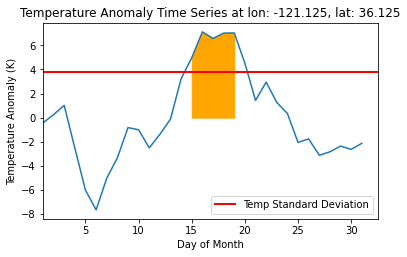

In [131]:
# Temperature anomaly time series with standard deviation at that point as the threshold
plt.plot(days,Temp_array)
plt.title("Temperature Anomaly Time Series at lon: -121.125, lat: 36.125")
plt.xlabel("Day of Month")
plt.ylabel("Temperature Anomaly (K)")
plt.axhline(y=Temp_specific_point.std(),linewidth=2, color='red',label="Temp Standard Deviation")
plt.legend()
plt.fill_between(days,Temp_array,where = np.logical_and(days>14, days<20),interpolate=False, color = 'orange')
plt.xlim(xmin=1)
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('tempAnom.png', dpi=300)

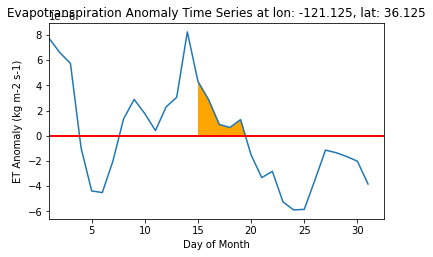

In [133]:
# Standardized Evapotranspiration anomaly time series with 0 as the threshold
ET_array = ET_validation.to_numpy()
plt.plot(days,ET_array)
plt.title("Evapotranspiration Anomaly Time Series at lon: -121.125, lat: 36.125")
plt.xlabel("Day of Month")
plt.ylabel("ET Anomaly (kg m-2 s-1)")
plt.axhline(y=0,linewidth=2, color='red')
plt.fill_between(days,ET_array,where = np.logical_and(days>14, days<20),interpolate=True, color = 'orange')
plt.xlim(xmin=1)
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('ETanom.png', dpi=300)

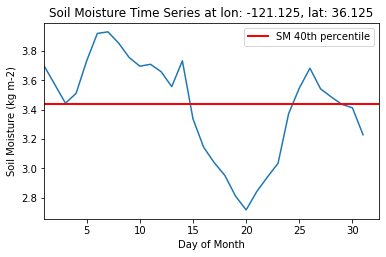

In [139]:
# Soil Moisture Time series with 40th percentile as the threshold
SM_threshold = SM_validation.quantile(0.4,dim='time')
SM_array = SM_validation.to_numpy()
plt.plot(days,SM_array)
plt.title("Soil Moisture Time Series at lon: -121.125, lat: 36.125")
plt.xlabel("Day of Month")
plt.ylabel("Soil Moisture (kg m-2)")
plt.axhline(y=SM_threshold,linewidth=2, color='red',label="SM 40th percentile")
#plt.fill_between(days,SM_array,where = np.logical_and(days>14, days<20),interpolate=True, color = 'orange')
plt.xlim(xmin=1)
plt.legend()
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('SM.png', dpi=300)

In [28]:
# Now checking our array of truth values to the three time series charts to see if the three conditions are true
# SM < 40 percentile , ET_anomaly > 0, Temp_Anomaly > Standard deviation
truth_values.sel(lat=36.125,lon=-121.125)
# Looking at the charts and our truth values from the code we used, we can see that the truth array generated from our code
# lines up with the information the 3 time series charts (with their different thresholds depending on the condition) are telling us
# From the 15 of august to the 19th of august based on our defenition of flash drought there is a flash drought occurence 
# in that time period

<xarray.DataArray (time: 31)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False])
Coordinates:
  * time      (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2020-08-31
    lon       float32 -121.1
    lat       float32 36.12
    quantile  float64 0.4